#Amazon Sentiment Analyzer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("amazon-cells-labelled.txt", sep = "\t", header = None)

In [3]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
column_names = ["Review", "Sentiment"]
data.columns = column_names

In [5]:
print(data.head())
print("\n" + str(data.shape))

                                              Review  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1

(1000, 2)


In [6]:
data["Review"].value_counts()

Works great.                                                                                      2
Great Phone.                                                                                      2
Great phone!.                                                                                     2
Works great!.                                                                                     2
Excellent product for the price.                                                                  2
                                                                                                 ..
It was an inexpensive piece, but I would still have expected better quality.                      1
It is practically useless and did not add any kind of boost to my reception after I bought it.    1
Excellent sound quality.                                                                          1
Was not happy.                                                                                    1


In [7]:
data.drop_duplicates(subset ="Review",
                     keep = False, inplace = True)        # Delete duplicate rows

In [8]:
data.shape

(980, 2)

In [9]:
data.isnull().sum()          # Missing data

Review       0
Sentiment    0
dtype: int64

In [10]:
x = data["Review"]
y = data["Sentiment"]

#Data Cleaning

In [11]:
from string import punctuation as str_punc
str_punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
from spacy.lang.en.stop_words import STOP_WORDS as stp_wrd

In [13]:
import spacy

In [14]:
!python -m spacy download en_core_web_md

2023-07-27 07:01:15.183013: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [15]:
nlp = spacy.load('en_core_web_md')

In [16]:
def text_cleaning(sentence):

  text = nlp(sentence)
  tokens = []
  for tok in text:
    if tok.lemma != "-PRON-":
      temp = tok.lemma_.lower().strip()             # if word isn't PRON so strip and lowercasing and lemmatization are run respectively
    else:
      temp = tok.lower_tokens.append(temp)

  cleaned_tokens = []
  for tok in tokens:
    if tok not in stp_wrd and tok not in str_punc:
      cleaned_tokens.append(tok)
  return cleaned_tokens

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = None, shuffle = True)

In [18]:
print(x_train.shape)
print(x_test.shape)

(686,)
(294,)


#Feature Engineering, Train Model and Results

In [19]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto' ,kernel="linear"))])


In [21]:
svm.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto', kernel='linear'))])

In [22]:
y_predict = svm.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
print(accuracy_score(y_test, y_predict))


0.8231292517006803


In [25]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       139
           1       0.82      0.86      0.84       155

    accuracy                           0.82       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.82      0.82      0.82       294



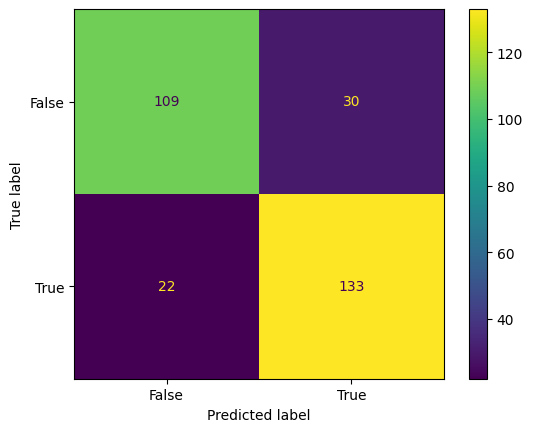

In [26]:
confusion_matrix = confusion_matrix(y_test, y_predict)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()